# LogLoss & AUC

In [1]:
from IPython.display import Image

# Quel contexte en ML

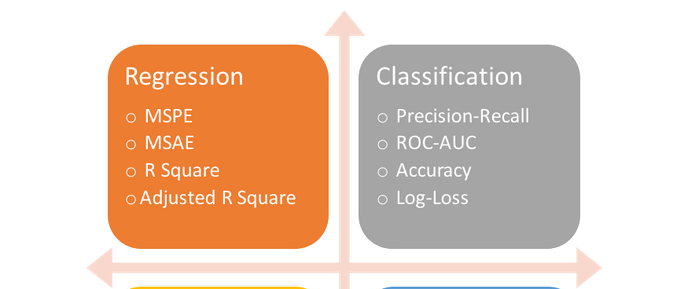

In [2]:
Image("lglAuc.png")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

# AUC rappel et concept

![cm](cm.png)


![roc](roc.png)

**1/ Recall or Sensitivity or TPR (True Positive Rate):**   
$TPR = \frac{TP}{(TP+FN)}$  
*Number of items correctly identified as positive out of total true positives*  

**2/ Specificity or TNR (True Negative Rate):**  
$TNR = \frac{TN}{(TN+FP)}$  
*Number of items correctly identified as negative out of total negatives*

**3/ False Positive Rate or Type I Error**  
$FPR = \frac{FP}{(FP+TN)}$  
*Number of items wrongly identified as positive out of total true negatives*

**4/ False Negative Rate or Type II Error:**  
$FNR = \frac{FN}{(FN+TP)}$  
*Number of items wrongly identified as negative out of total true positives*


# LogLoss rappel et concept

$LogLoss = -\frac{1}{n}\sum_{i=1}^n [y_ilog(\hat{y}_i)+(1-y_i)log(1- \hat{y}_i)]$


![lgl](lgl.png)

# Quelle relation entre LogLoss et AUC ?  
Une étude empirique

# Generation de dataset de classification

In [5]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

## Make Circles

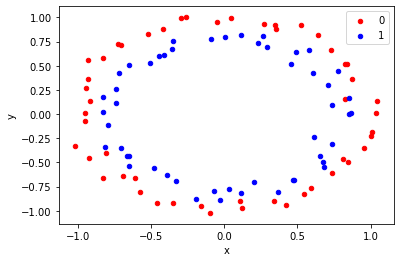

In [6]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [7]:
df.describe()

,x,y,label
count,100.000000,100.000000,100.000000
mean,0.003232,-0.002378,0.500000
std,0.641736,0.639415,0.502519
min,-1.018505,-1.021753,0.000000
25%,-0.650932,-0.615622,0.000000
50%,0.019263,0.015051,0.500000
75%,0.609861,0.605185,1.000000
max,1.046602,1.000959,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBAFF2A388>]],
      dtype=object)

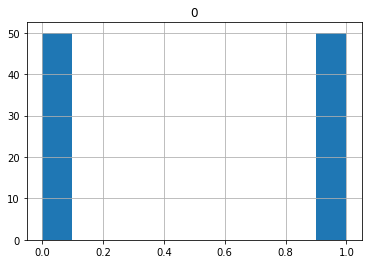

In [8]:
df_y = pd.DataFrame(y)
df_y.hist()

## Make moons

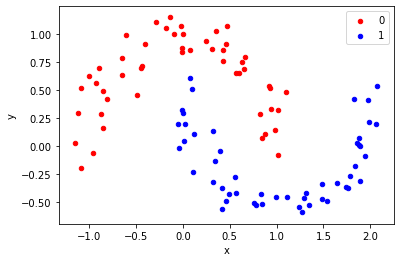

In [9]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [10]:
df.describe()

,x,y,label
count,100.000000,100.000000,100.000000
mean,0.502629,0.230830,0.500000
std,0.892399,0.515171,0.502519
min,-1.155270,-0.588130,0.000000
25%,-0.025362,-0.270060,0.000000
50%,0.460193,0.206789,0.500000
75%,1.106814,0.661349,1.000000
max,2.070136,1.148065,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB038B3C8>]],
      dtype=object)

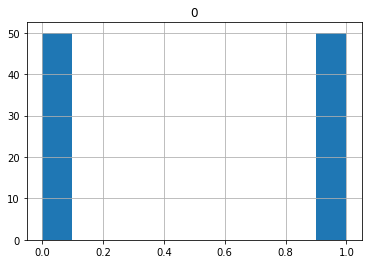

In [11]:
df_y = pd.DataFrame(y)
df_y.hist()

# Les metrics pour evaluer les experiences

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
def StatRegLin (X,y):
    #Correlation
    corr = np.corrcoef(X,y)
    #Regression
    X = X[:,np.newaxis]
    RegLin = LinearRegression ()
    RegLin.fit(X,y)
    y_predict = RegLin.predict (X)
    coef = RegLin.coef_
    r2 = r2_score(y,y_predict)
    intercept = RegLin.intercept_
    
    r2_str = np.array2string (r2, formatter ={'float_kind': lambda x: "%.2f" % x})
    a_str = np.array2string (coef[0], formatter ={'float_kind': lambda x: "%.2f" % x})
    b_str = np.array2string (intercept, formatter ={'float_kind': lambda x: "%.2f" % x})
    corr_str = np.array2string (corr[1,0], formatter ={'float_kind': lambda x: "%.2f" % x})
    
    eq = "y = " + a_str + "x + " + b_str
    R2 = "R2 = " + r2_str
    corr =  "Correlation = "+ corr_str
    
    return  eq, R2, corr

# Simulation de prediction avec random_sample

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB062C288>,
      dtype=object)

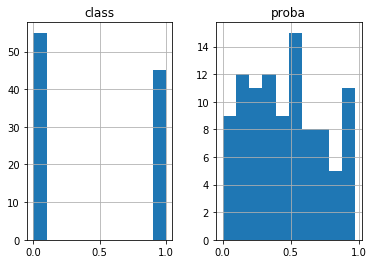

In [14]:
df_y = pd.DataFrame(df_y)
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.random_sample(100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


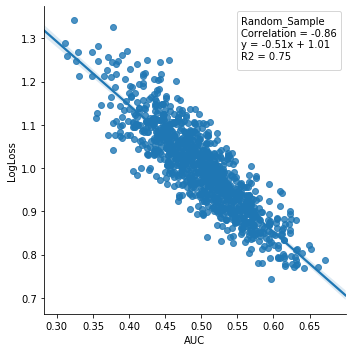

In [15]:
sim ="Random_Sample"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)

# Simulation de prediction avec random_uniform

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB0BE5F88>,
      dtype=object)

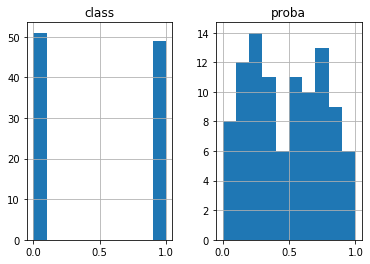

In [16]:
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.uniform(0, 1, 100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


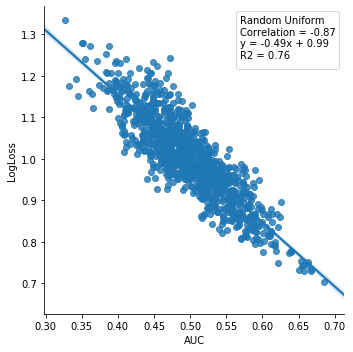

In [17]:
sim ="Random Uniform"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)

# Simulation de prediction avec random_normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB0CDE208>,
      dtype=object)

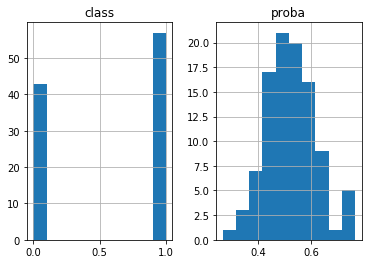

In [18]:
res = pd.DataFrame({"i" : [], "LogLoss" : [], "AUC": [] })

for i in range (1,1000):
    df_prev = pd.DataFrame({'proba': np.random.normal(0.5, 0.1, 100)})
    df_prev.loc[df_prev['proba'] >= 0.5,'class'] = 1
    df_prev.loc[df_prev['proba'] < 0.5,'class'] = 0
    lgl = log_loss (df_y,df_prev['proba'])
    auc = roc_auc_score(df_y, df_prev['proba'])
    res = res.append({"i" : i, "LogLoss" : lgl, "AUC": auc}, ignore_index = True)

#df_y.hist()
df_prev.hist()

No handles with labels found to put in legend.


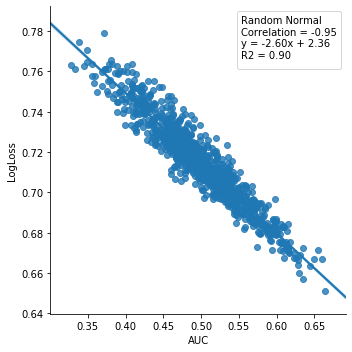

In [19]:
sim ="Random Normal"
X= res['LogLoss'].copy()
y = res['AUC'].copy()

eq, R2, corr = StatRegLin(X,y)

MyTitle = sim + "\n" + corr+ "\n" + eq + "\n" + R2

g = sns.lmplot(x="AUC", y="LogLoss", data=res)
plt.legend (title = MyTitle)
plt.show(g)


# Recap des resultats

```
              Prevision   Prevision	Prevision
              Random      Random       Random
              Sample 	 Uniform	  Normal
Correlation   -0,87	  -0,86	     -0,96
Pente (eq)	-0,49	  -0,50	     -2,61
R2	         0,76	   0,74	      0,91
```

# Des ressources pour approfondir

1/ http://www.datamachines.io/devrandom/2019/5/22/auc-vs-log-loss  
2/ https://stats.stackexchange.com/questions/235089/optimizing-auc-vs-logloss-in-binary-classification-problems  
3/ https://stackoverflow.com/questions/58610117/comparing-auc-log-loss-and-accuracy-scores-between-models  
4/ https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428  
5/ https://www.kaggle.com/c/adams-faces-ss19/discussion/100507  
6/ https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/  